In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import missingno as msg
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('deliveries.csv')
df1 = pd.read_csv('matches.csv')

In [3]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [5]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
df1.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
print(df1.team1.unique())

['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


In [8]:
print(df1.team2.unique())

['Royal Challengers Bangalore' 'Rising Pune Supergiant'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Delhi Daredevils'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions' 'Rajasthan Royals'
 'Chennai Super Kings' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Rising Pune Supergiants' 'Delhi Capitals']


In [9]:
# consider rcb and kxp team

In [10]:
main_df = df1[((df1['team1'] == 'Royal Challengers Bangalore') & (df1['team2'] == 'Kings XI Punjab')) | ((df1['team1'] == 'Kings XI Punjab') & (df1['team2'] == 'Royal Challengers Bangalore'))]
main_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
41,42,2017,Bangalore,2017-05-05,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kings XI Punjab,19,0,Sandeep Sharma,M Chinnaswamy Stadium,CB Gaffaney,C Shamshuddin,NaN
83,84,2008,Bangalore,2008-05-05,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,S Sreesanth,M Chinnaswamy Stadium,SJ Davis,BR Doctrove,NaN
93,94,2008,Chandigarh,2008-05-12,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,9,SE Marsh,"Punjab Cricket Association Stadium, Mohali",BR Doctrove,I Shivram,NaN
126,127,2009,Durban,2009-04-24,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,7,RS Bopara,Kingsmead,BR Doctrove,TH Wijewardene,NaN
138,139,2009,Durban,2009-05-01,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,8,0,Yuvraj Singh,Kingsmead,HDPK Dharmasena,S Ravi,NaN
180,181,2010,Bangalore,2010-03-16,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,Royal Challengers Bangalore,0,8,JH Kallis,M Chinnaswamy Stadium,S Das,DJ Harper,NaN
204,205,2010,Chandigarh,2010-04-02,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,Royal Challengers Bangalore,0,6,KP Pietersen,"Punjab Cricket Association Stadium, Mohali",BF Bowden,M Erasmus,NaN
279,280,2011,Bangalore,2011-05-06,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,85,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,RB Tiffin,NaN
295,296,2011,Dharamsala,2011-05-17,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,Kings XI Punjab,111,0,AC Gilchrist,Himachal Pradesh Cricket Association Stadium,Asad Rauf,AM Saheba,NaN


In [16]:
main_df.reset_index(inplace  =True)

# Ques 1 - Who will win ?

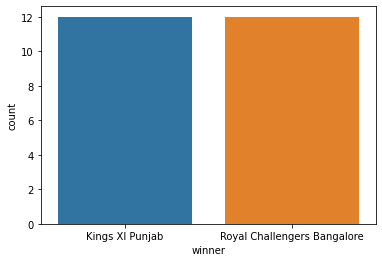

In [12]:
sb.countplot(main_df['winner'])

In [13]:
main_df['winner'].value_counts()

Kings XI Punjab                12
Royal Challengers Bangalore    12
Name: winner, dtype: int64

In [14]:
## As per the record , both team have won equally , and taking into consideration previous stats
## Rcb - 12 win
## Kxp - 13 win

In [15]:
## Since ,the Stadium is Sharjah, batting pitch !  , I guess RCB has a chance to win , if they dismiss gayle earlier

# Ques 1 Ans - RCB

In [17]:
########################################################################################################################

# Ques 2 - Wicket lost by kxp

In [22]:
main_df_team = df[(((df['batting_team'] == 'Royal Challengers Bangalore') | (df['batting_team'] == 'Kings XI Punjab')) & ((df['bowling_team'] == 'Royal Challengers Bangalore') | (df['bowling_team'] == 'Kings XI Punjab')))]

In [23]:
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1678,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,1,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1679,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,2,Vishnu Vinod,SR Watson,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1680,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,3,Vishnu Vinod,SR Watson,AR Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1681,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,4,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1682,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,5,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174939,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,2,R Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,R Ashwin,caught,V Kohli
174940,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,3,H Viljoen,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,H Viljoen,caught,PA Patel
174941,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,4,M Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
174942,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,5,M Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [24]:
len(main_df_team['match_id'].unique())

24

In [26]:
team_kxp = main_df_team[main_df_team['batting_team'] == 'Kings XI Punjab']

In [27]:
team_kxp

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1801,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,1,M Vohra,HM Amla,B Stanlake,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1802,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,2,M Vohra,HM Amla,B Stanlake,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1803,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,3,HM Amla,M Vohra,B Stanlake,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
1804,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,4,HM Amla,M Vohra,B Stanlake,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1805,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,5,HM Amla,M Vohra,B Stanlake,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174939,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,2,R Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,R Ashwin,caught,V Kohli
174940,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,3,H Viljoen,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,H Viljoen,caught,PA Patel
174941,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,4,M Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
174942,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,5,M Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [28]:
team_kxp['player_dismissed'].notna().sum()

135

In [29]:
len(team_kxp['match_id'].unique())

24

In [30]:
# Avg wickets wrt rcb
135 / 24

5.625

In [31]:
team_all = df[(df['batting_team'] == 'Kings XI Punjab') | (df['batting_team'] == 'Royal Challengers Bangalore')]
team_all

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177869,11346,2,Kings XI Punjab,Chennai Super Kings,18,3,S Curran,Mandeep Singh,Imran Tahir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
177870,11346,2,Kings XI Punjab,Chennai Super Kings,18,4,S Curran,Mandeep Singh,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177871,11346,2,Kings XI Punjab,Chennai Super Kings,18,5,Mandeep Singh,S Curran,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177872,11346,2,Kings XI Punjab,Chennai Super Kings,17,6,Mandeep Singh,S Curran,RA Jadeja,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [32]:
team_kxp_all = team_all[team_all['batting_team'] == 'Kings XI Punjab']

In [34]:
wickets = team_kxp_all['player_dismissed'].notna().sum()
match = team_kxp_all['match_id'].nunique()

In [36]:
wickets , match

(1081, 176)

In [37]:
wickets / match

6.142045454545454

In [38]:
## Avg wickets wrt to all team
## 6.14

In [39]:
## looking at this year stats too , avg wickets is 7

# Ques 2 ans - 6-8 wickets

In [41]:
#####################################################################################################################################

# Ques 3 - PartnerShip by vk and abd

In [43]:
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1678,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,1,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1679,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,2,Vishnu Vinod,SR Watson,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1680,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,3,Vishnu Vinod,SR Watson,AR Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1681,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,4,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1682,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,5,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174939,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,2,R Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,R Ashwin,caught,V Kohli
174940,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,3,H Viljoen,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,H Viljoen,caught,PA Patel
174941,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,4,M Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
174942,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,5,M Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [44]:
rcb_team = main_df_team[main_df_team['batting_team'] == 'Royal Challengers Bangalore']

In [46]:
rcb_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1678,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,1,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1679,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,2,Vishnu Vinod,SR Watson,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1680,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,3,Vishnu Vinod,SR Watson,AR Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1681,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,4,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1682,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,5,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174814,11333,1,Royal Challengers Bangalore,Kings XI Punjab,20,2,AB de Villiers,MP Stoinis,H Viljoen,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
174815,11333,1,Royal Challengers Bangalore,Kings XI Punjab,20,3,MP Stoinis,AB de Villiers,H Viljoen,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
174816,11333,1,Royal Challengers Bangalore,Kings XI Punjab,20,4,MP Stoinis,AB de Villiers,H Viljoen,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
174817,11333,1,Royal Challengers Bangalore,Kings XI Punjab,20,5,MP Stoinis,AB de Villiers,H Viljoen,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [47]:
rcb_team['batsman'].unique()

array(['SR Watson', 'Vishnu Vinod', 'AB de Villiers', 'KM Jadhav',
       'Mandeep Singh', 'STR Binny', 'CH Gayle', 'V Kohli', 'P Negi',
       'S Aravind', 'S Badree', 'YS Chahal', 'A Choudhary', 'W Jaffer',
       'CL White', 'JH Kallis', 'R Dravid', 'Misbah-ul-Haq', 'P Kumar',
       'DT Patil', 'Z Khan', 'A Kumble', 'DW Steyn', 'J Arunkumar',
       'MV Boucher', 'R Vinay Kumar', 'JD Ryder', 'RV Uthappa',
       'KP Pietersen', 'LRPL Taylor', 'Pankaj Singh', 'R Bishnoi',
       'SP Goswami', 'RE van der Merwe', 'KP Appanna', 'MK Pandey',
       'TM Dilshan', 'SS Tiwary', 'AUK Pathan', 'M Kaif', 'A Mithun',
       'KB Arun Karthik', 'JJ van der Wath', 'CK Langeveldt',
       'MA Agarwal', 'AB McDonald', 'DL Vettori', 'CA Pujara',
       'MC Henriques', 'KL Rahul', 'PA Patel', 'YV Takawale',
       'Yuvraj Singh', 'JA Morkel', 'MA Starc', 'VR Aaron', 'AB Dinda',
       'S Rana', 'HV Patel', 'KD Karthik', 'SN Khan', 'D Wiese',
       'Sachin Baby', 'TM Head', 'Q de Kock', 'BB McCullum

In [49]:
partner = rcb_team[(((rcb_team['batsman'] == 'V Kohli') & (rcb_team['non_striker'] == 'AB de Villiers')) | ((rcb_team['batsman'] == 'AB de Villiers') & (rcb_team['non_striker'] == 'V Kohli')))]

In [50]:
partner

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
66278,280,1,Royal Challengers Bangalore,Kings XI Punjab,15,5,AB de Villiers,V Kohli,PP Chawla,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
66279,280,1,Royal Challengers Bangalore,Kings XI Punjab,15,6,V Kohli,AB de Villiers,PP Chawla,0,...,0,0,0,0,0,0,0,V Kohli,bowled,NaN
82571,350,1,Royal Challengers Bangalore,Kings XI Punjab,16,3,AB de Villiers,V Kohli,Azhar Mahmood,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
82572,350,1,Royal Challengers Bangalore,Kings XI Punjab,16,4,AB de Villiers,V Kohli,Azhar Mahmood,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
82573,350,1,Royal Challengers Bangalore,Kings XI Punjab,16,5,AB de Villiers,V Kohli,Azhar Mahmood,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171525,11319,2,Royal Challengers Bangalore,Kings XI Punjab,15,5,AB de Villiers,V Kohli,M Ashwin,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
171526,11319,2,Royal Challengers Bangalore,Kings XI Punjab,15,6,V Kohli,AB de Villiers,M Ashwin,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
171527,11319,2,Royal Challengers Bangalore,Kings XI Punjab,16,1,V Kohli,AB de Villiers,Mohammed Shami,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
171528,11319,2,Royal Challengers Bangalore,Kings XI Punjab,16,2,AB de Villiers,V Kohli,Mohammed Shami,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [51]:
match = partner['match_id'].nunique()
runs = partner['total_runs'].sum()

In [52]:
match , runs

(7, 120)

In [53]:
120 / 7

17.142857142857142

In [54]:
## avg partnership wrt kxp == 17.14

In [55]:
## Lets check for other teams too

In [60]:
partner_all = team_all[(((team_all['batsman'] == 'V Kohli') & (team_all['non_striker'] == 'AB de Villiers')) | ((team_all['batsman'] == 'AB de Villiers') & (team_all['non_striker'] == 'V Kohli')))]

In [62]:
match_all = partner_all['match_id'].nunique()
runs_all = partner_all['total_runs'].sum()

In [63]:
match_all , runs_all

(68, 2860)

In [64]:
2860 / 68

42.05882352941177

In [124]:
## Avg is 42 wrt other teams !

In [ ]:
## Being a sharjah stadium , i guess they will project more than 40+ runs partnership

In [66]:
## Acc to previous stats too , the partnership will be more than 40+

# Ques 3 ans - 40+

In [67]:
########################################################################################################################

In [68]:
# Ques 4 - No of sixes ?

In [69]:
rcb_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1678,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,1,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1679,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,2,Vishnu Vinod,SR Watson,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1680,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,3,Vishnu Vinod,SR Watson,AR Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1681,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,4,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1682,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,5,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174814,11333,1,Royal Challengers Bangalore,Kings XI Punjab,20,2,AB de Villiers,MP Stoinis,H Viljoen,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
174815,11333,1,Royal Challengers Bangalore,Kings XI Punjab,20,3,MP Stoinis,AB de Villiers,H Viljoen,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
174816,11333,1,Royal Challengers Bangalore,Kings XI Punjab,20,4,MP Stoinis,AB de Villiers,H Viljoen,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
174817,11333,1,Royal Challengers Bangalore,Kings XI Punjab,20,5,MP Stoinis,AB de Villiers,H Viljoen,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [72]:
six = rcb_team[rcb_team['batsman_runs'] == 6]

In [73]:
six

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1695,8,1,Royal Challengers Bangalore,Kings XI Punjab,3,6,AB de Villiers,Vishnu Vinod,MM Sharma,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
1731,8,1,Royal Challengers Bangalore,Kings XI Punjab,9,6,Mandeep Singh,AB de Villiers,T Natarajan,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
1771,8,1,Royal Challengers Bangalore,Kings XI Punjab,16,3,AB de Villiers,STR Binny,VR Aaron,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
1777,8,1,Royal Challengers Bangalore,Kings XI Punjab,17,3,AB de Villiers,STR Binny,MP Stoinis,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
1781,8,1,Royal Challengers Bangalore,Kings XI Punjab,17,7,AB de Villiers,STR Binny,MP Stoinis,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174810,11333,1,Royal Challengers Bangalore,Kings XI Punjab,19,4,AB de Villiers,MP Stoinis,Mohammed Shami,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
174811,11333,1,Royal Challengers Bangalore,Kings XI Punjab,19,5,AB de Villiers,MP Stoinis,Mohammed Shami,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
174813,11333,1,Royal Challengers Bangalore,Kings XI Punjab,20,1,AB de Villiers,MP Stoinis,H Viljoen,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
174816,11333,1,Royal Challengers Bangalore,Kings XI Punjab,20,4,MP Stoinis,AB de Villiers,H Viljoen,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [74]:
match_six = six['match_id'].nunique()
six_total = six['batsman_runs'].sum()

In [75]:
match_six , six_total

(24, 954)

In [76]:
954 / 24

39.75

In [77]:
40 / 6

6.666666666666667

In [79]:
## 7 sixes for rcb in one match against kxp

In [80]:
kxp_team = main_df_team[main_df_team['batting_team'] == 'Kings XI Punjab']

In [81]:
kxp_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1801,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,1,M Vohra,HM Amla,B Stanlake,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1802,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,2,M Vohra,HM Amla,B Stanlake,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1803,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,3,HM Amla,M Vohra,B Stanlake,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
1804,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,4,HM Amla,M Vohra,B Stanlake,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1805,8,2,Kings XI Punjab,Royal Challengers Bangalore,1,5,HM Amla,M Vohra,B Stanlake,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174939,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,2,R Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,R Ashwin,caught,V Kohli
174940,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,3,H Viljoen,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,H Viljoen,caught,PA Patel
174941,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,4,M Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
174942,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,5,M Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [82]:
six_k = kxp_team[kxp_team['batsman_runs'] == 6]
match_six_k = six_k['match_id'].nunique()
six_total_k = six_k['batsman_runs'].sum()

In [83]:
match_six_k , six_total_k

(23, 780)

In [84]:
780 / 23

33.91304347826087

In [85]:
34/6

5.666666666666667

In [87]:
# avg 5.6 sixes by kxp againt rcb

In [88]:
## Therefore total might be more than 12
## also match is in sharjah stadium , sixes will shower here :)

# Ques 4 ans - more than 15

In [89]:
########################################################################################################################

# Ques 5 - no ball bowled in total ?

In [97]:
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1678,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,1,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1679,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,2,Vishnu Vinod,SR Watson,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1680,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,3,Vishnu Vinod,SR Watson,AR Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1681,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,4,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1682,8,1,Royal Challengers Bangalore,Kings XI Punjab,1,5,SR Watson,Vishnu Vinod,AR Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174939,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,2,R Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,R Ashwin,caught,V Kohli
174940,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,3,H Viljoen,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,H Viljoen,caught,PA Patel
174941,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,4,M Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
174942,11333,2,Kings XI Punjab,Royal Challengers Bangalore,20,5,M Ashwin,Mandeep Singh,UT Yadav,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [95]:
noball = main_df_team[main_df_team['noball_runs'] >0]

In [98]:
noball.noball_runs.unique()

array([1, 5, 2], dtype=int64)

In [100]:
noball_count = len(noball)
match_noball = noball['match_id'].nunique()

In [101]:
noball_count , match_noball

(24, 14)

In [102]:
24/14

1.7142857142857142

In [121]:
## 2 no ball including both team

In [123]:
noball.groupby('match_id')['noball_runs'].count()
## As we can see , no ball lies between 1-2

match_id
181      2
205      2
280      1
296      2
333      1
429      3
448      2
475      2
488      2
557      1
566      1
626      2
7941     1
11333    2
Name: noball_runs, dtype: int64

# Ques 5 ans - (1-2) noball